In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "batang")
plt.rc("axes", unicode_minus = False)


# Review of LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
mtcars = pd.read_excel("./dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
train_X = mtcars.loc[:, "cyl":"qsec"]
train_y = mtcars.loc[:, "mpg"]

print(train_X.head())
print(train_y.head())

# X 대문자는 matrix, y 는 하나라서 벡터, 그래서 소문자 

print("X type = ", type(train_X.head()))
print("y type = ", type(train_y.head()))

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
X type =  <class 'pandas.core.frame.DataFrame'>
y type =  <class 'pandas.core.series.Series'>


In [8]:
lr = LinearRegression() #클래스생성
lr.fit(train_X, train_y) #클래스 호출


LinearRegression()

In [11]:
print("Train R-square = ", round(lr.score(train_X, train_y), 3))
#이건 왜 .round(3) 안되지?

Train R-square =  0.855


In [16]:
#lr.coef_
#train_X.columns

coeff_df = pd.DataFrame(lr.coef_, index = train_X.columns, columns =["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


# KNN 

In [17]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# list 길이
print(type(bream_length))
print("length of bream = ", len(bream_length), "\nlength of smelt = ",len(smelt_length))

# 요약 통계량
print("mean of 도미길이 = ", round(np.mean(bream_length), ndigits = 2))
print("mean of 방어길이 = ", round(np.mean(smelt_length), ndigits = 2))

print("mean of 도미무게 = ", round(np.mean(bream_weight), ndigits = 2))
print("mean of 방어무게 = ", round(np.mean(smelt_weight), ndigits = 2))

<class 'list'>
length of bream =  35 
length of smelt =  14
mean of 도미길이 =  33.11
mean of 방어길이 =  11.92
mean of 도미무게 =  617.83
mean of 방어무게 =  11.18


In [18]:
#string interpolation
print("도마 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(bream_length)))

도마 무게 = 617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 33.1086


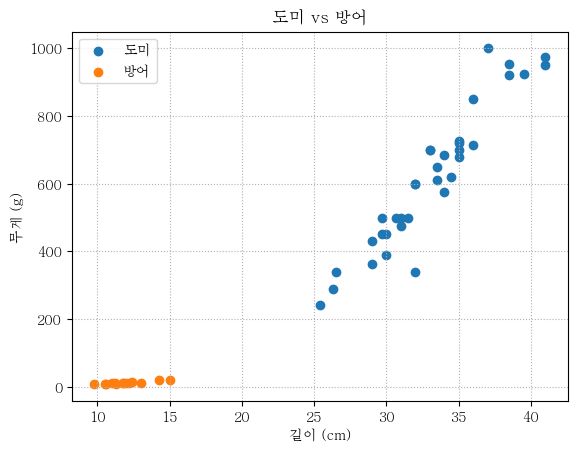

In [23]:
## scatter plot
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.xlabel("길이 (cm)")
plt.ylabel("무게 (g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [31]:
## list 구조는 sns 못불러옴 sns 는 dataframe 형식만 지원
## list

length = bream_length + smelt_length 
#length #두개가 더해지는 게 아니고 뒤에가서 리스트가 그냥 붙음 
weight = bream_weight + smelt_weight
print(np.shape(length))
print(np.shape(weight))

# x_2d 
fish_data = np.column_stack([length, weight]) #컬럼스택 두개 묶음
print(fish_data)

print(type(fish_data))
print(np.shape(fish_data)) #(49, 2) 49행, 2열 

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
<class 'numpy.ndarray'>
(49, 2)


In [33]:
## 1과 0으로 바꾼거 #범주의 명목자료로 바꿔준거임 한글을 숫자로 바꿔야 컴터가 인식
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
# knn 클래스 만들어 
from sklearn.neighbors import KNeighborsClassifier #만들려면 skleanrn 불러야해


In [36]:
# 클래스인스턴스만들어
knn = KNeighborsClassifier(n_neighbors = 5, 
                           weights = "uniform",
                           metric = "minkowski",
                           p = 2)
# n_neighbors 정도만 연구자들이 건드리고 나머지는 기본값.  
# weights = uniform : 거리를 계산하지 않겠다. 

knn.fit(fish_data, fish_target)
print("Train ACC = ", knn.score(fish_data, fish_target))

#결과값 accuracy=1 이라는 의미는 100% 정확히 예측했다는 것. 

Train ACC =  1.0


In [38]:
## Attribute ##매뉴얼? 매뉴얼이 어딧쥐 

print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes =  [0. 1.]
metrics =  euclidean
samples =  49


In [42]:
# print(fish_data)
# print(fish_target)
np.column_stack([fish_data, fish_target])


array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [45]:
#3분의2를 training set으로, 3분의1 은 test set 으로 쓸거야 
## shuffling 뽑을 때 잘 뽑아야지 

idx = np.arange(49)
idx
np.random.shuffle(idx)
print(idx)

[42 33 38 30 48 47 44 23 15  2 20 35 11 19 28  5 29 24 10 45 22 31  9  0
  7 21  1 14 17 46  8 39 12 26 37 16 43  4 36 13 40 32  6 25 41  3 34 18
 27]


In [50]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print(np.column_stack((test_X, test_y)))


[[  11.8    9.9    0. ]
 [  41.   975.     1. ]
 [  11.     9.7    0. ]
 [  38.5  920.     1. ]
 [  15.    19.9    0. ]
 [  14.3   19.7    0. ]
 [  12.2   12.2    0. ]
 [  35.   680.     1. ]
 [  32.   600.     1. ]
 [  26.5  340.     1. ]
 [  34.   575.     1. ]
 [   9.8    6.7    0. ]
 [  31.   500.     1. ]
 [  33.5  650.     1. ]
 [  36.   850.     1. ]
 [  29.7  450.     1. ]
 [  37.  1000.     1. ]
 [  35.   700.     1. ]
 [  31.   475.     1. ]
 [  12.4   13.4    0. ]
 [  34.5  620.     1. ]
 [  38.5  955.     1. ]
 [  30.7  500.     1. ]
 [  25.4  242.     1. ]
 [  30.   390.     1. ]
 [  34.   685.     1. ]
 [  26.3  290.     1. ]
 [  32.   600.     1. ]
 [  33.   700.     1. ]
 [  13.    12.2    0. ]
 [  30.   450.     1. ]
 [  11.2    9.8    0. ]
 [  31.5  500.     1. ]
 [  35.   720.     1. ]
 [  10.6    7.     0. ]]


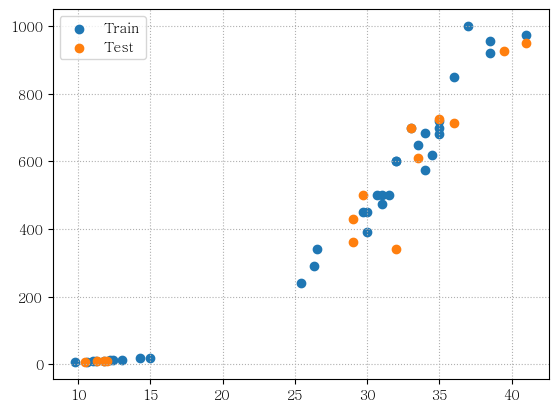

In [51]:
plt.scatter(train_X[:, 0], train_X[:, 1], label = "Train") #(x-length, x-weight)
plt.scatter(test_X[:, 0], test_X[:, 1], label = "Test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [ ]:
# knn 클래스 만들어 - 이번엔 parameter 도 변경해보자
knn = KNeighborsClassifier(
    n_neighbors = 5, 
    weights = "uniform", 
    metrics = "minkowski", #그냥 정해진거 
    p = 2 #이게 1이면맨하탄, 3이면 민코프스키
)

In [54]:
knn.fit(train_X, train_y)
print("Test Acc = ", knn.score(test_X, test_y))

print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)


Test Acc =  1.0
classes =  [0. 1.]
metrics =  euclidean
samples =  35


In [55]:
# X, y 데이터들을 훈련용과 테스트용으로 나눠야함. train, test 

from sklearn.model_selection import train_test_split


In [61]:
#stratify : 계층화 
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify = fish_target
)

print(train_X)

[[  33.5  610. ]
 [  31.   475. ]
 [  36.   714. ]
 [  30.   390. ]
 [  34.5  620. ]
 [  35.   725. ]
 [  37.  1000. ]
 [  33.5  650. ]
 [  41.   950. ]
 [  11.8   10. ]
 [  41.   975. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  30.7  500. ]
 [  32.   340. ]
 [  31.   500. ]
 [  34.   575. ]
 [  29.   363. ]
 [  26.3  290. ]
 [  36.   850. ]
 [  12.     9.8]
 [  11.     9.7]
 [  11.3    8.7]
 [  33.   700. ]
 [  38.5  955. ]
 [  10.6    7. ]
 [  12.2   12.2]
 [  25.4  242. ]
 [  13.    12.2]
 [  32.   600. ]
 [  33.   700. ]
 [  29.7  500. ]
 [  14.3   19.7]
 [  15.    19.9]
 [  29.   430. ]
 [  26.5  340. ]]


In [62]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

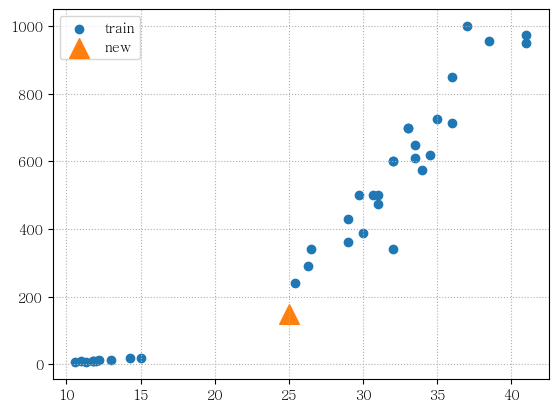

In [67]:
##
plt.scatter(train_X[:, 0], train_X[:, 1] , label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.legend()
plt.grid(linestyle = ":")
plt.show()


In [71]:
knn.predict([[25, 150]])

array([0.])

In [ ]:
# 결과를 보면 뭔가이상하지? 단위가 안맞아서그래 -> 표준화필요
# 그래서 knn 은 표준화가 반드시 필요함. 

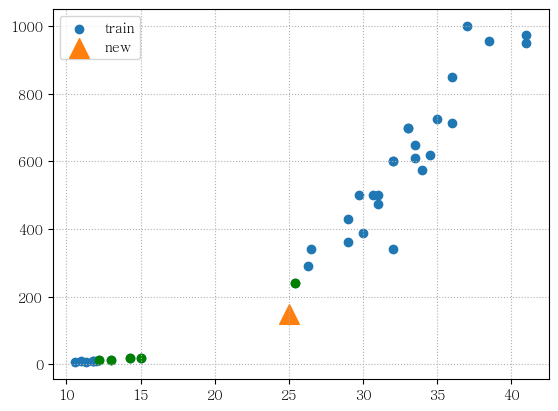

In [76]:
distance, index = knn.kneighbors([[25, 150]])
#뭐를가지고 가장가까운 5개를 판단했는지 알려줘

plt.scatter(train_X[:, 0], train_X[:, 1] , label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "g")
plt.legend()
plt.grid(linestyle = ":")
plt.show()




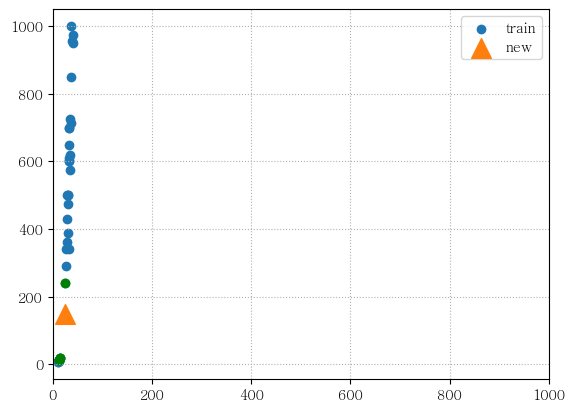

In [77]:
distance, index = knn.kneighbors([[25, 150]])
#뭐를가지고 가장가까운 5개를 판단했는지 알려줘

plt.scatter(train_X[:, 0], train_X[:, 1] , label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "g")
plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [84]:
#표준화 해보자 -> train data 의 평균을 구해야지

mean = np.mean(train_X, axis = 0) #axis = 0 밑으로 
std = np.std(train_X, axis = 0) 

train_scaled = (train_X - np.mean(train_X, axis = 0))/ np.std(train_X, axis = 0) 
#train_scaled

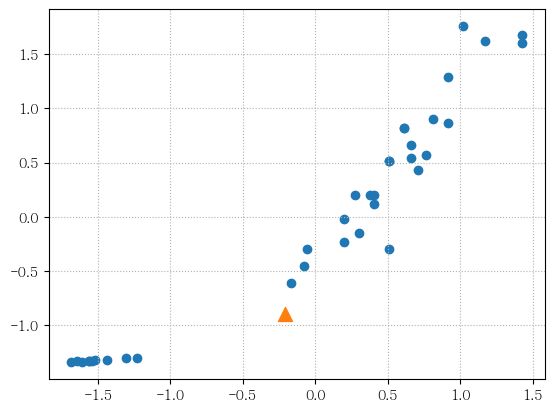

In [86]:
new = ([25, 150] - mean) / std


plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^", s = 100)
plt.grid(linestyle = ":")
plt.show()

In [89]:
test_scaled = (test_X - mean) / std
knn.fit(train_scaled, train_y)
print("TEST ACC = ", knn.score(test_scaled, test_y))
print("Prediction = ", knn.predict([new]))

TEST ACC =  1.0
Prediction =  [1.]


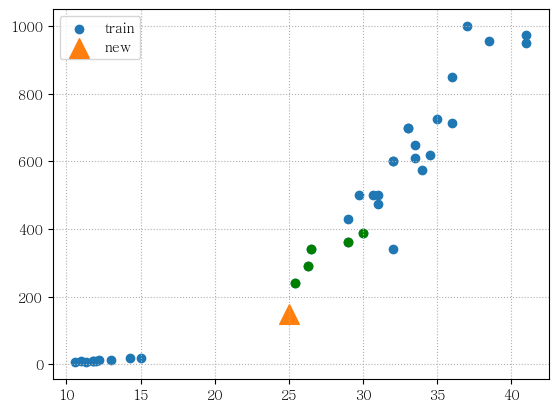

In [90]:
distance, index = knn.kneighbors([new])

plt.scatter(train_X[:, 0], train_X[:, 1] , label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "g")
#plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [92]:
## Grid Search
knn = KNeighborsClassifier()
score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

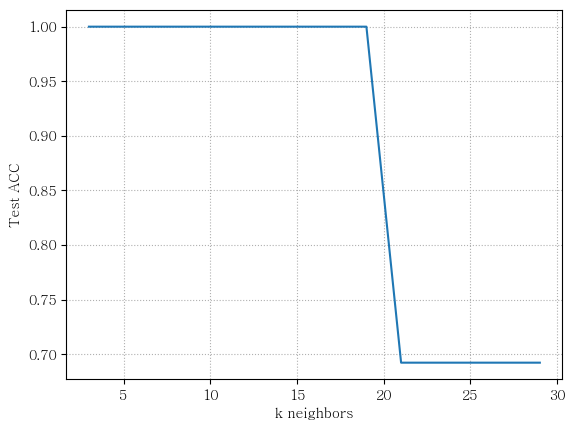

In [93]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

In [101]:
## KNN을 이용하여 Seaborn iris 자료 분류 

iris = sns.load_dataset('iris')
print(iris.head())
print(iris.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
print(iris.shape)
print(iris.head())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


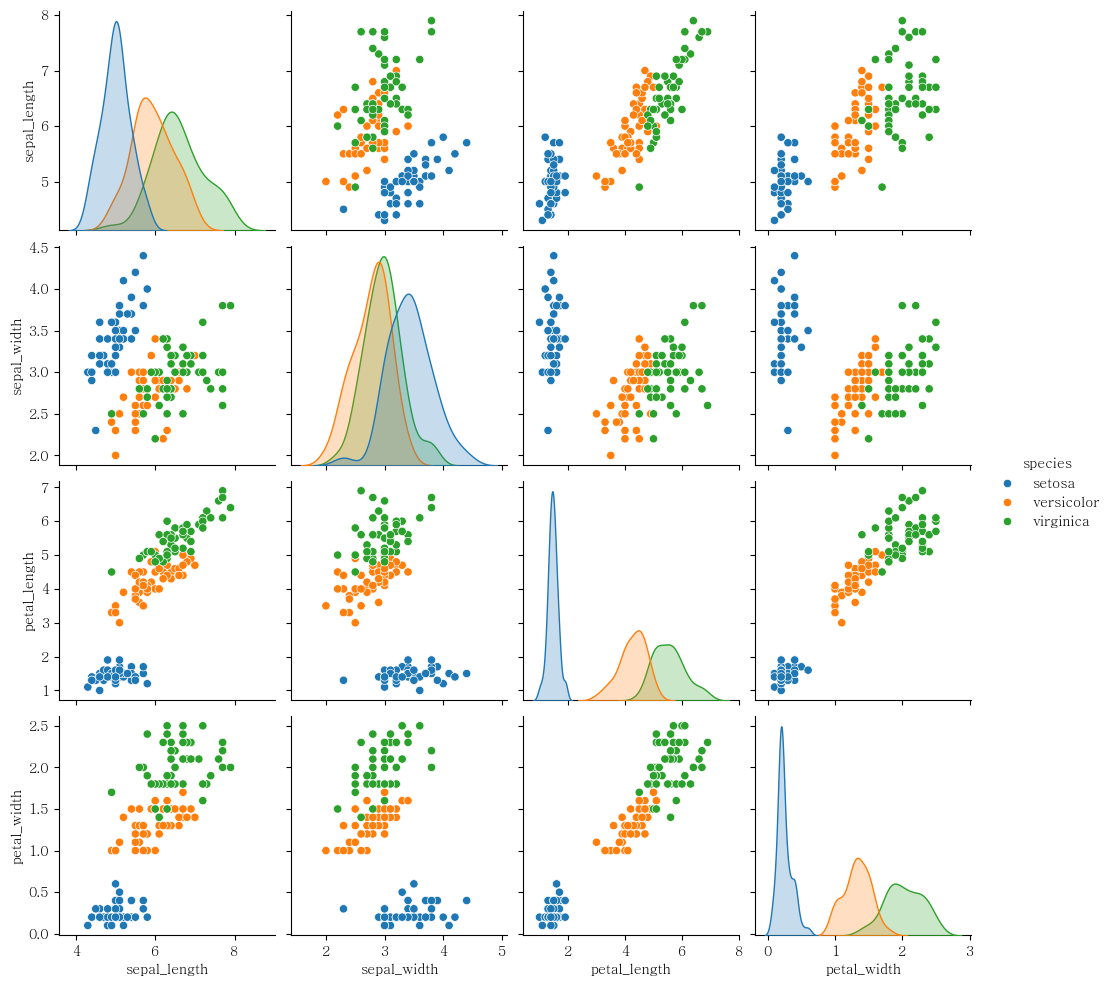

In [110]:
#Visualization 

sns.pairplot(iris, hue = "species")
plt.show()

In [125]:
X = iris.loc[:,'sepal_length':'petal_width'] #loc[:, :'petal_length']
y = iris['species']


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify =y)

print("train_X shape = ", train_X.shape)
print("test_X shape = ", test_X.shape)

train_X shape =  (120, 4)
test_X shape =  (30, 4)


In [126]:
test_y.value_counts()

species
versicolor    10
setosa        10
virginica     10
Name: count, dtype: int64

In [127]:
## Scaling - 표준화 
mean = train_X.mean()
std = train_X.std()

print(mean, std) 
#아까는 왜 np써야 하고 이건 왜 또 안쓰냐? 

train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std
print(train_scaled)

sepal_length    5.827500
sepal_width     3.033333
petal_length    3.746667
petal_width     1.186667
dtype: float64 sepal_length    0.814776
sepal_width     0.436051
petal_length    1.761967
petal_width     0.758696
dtype: float64
     sepal_length  sepal_width  petal_length  petal_width
75       0.948114    -0.076444      0.370798     0.281184
25      -1.015617    -0.076444     -1.218336    -1.300478
147      0.825381    -0.076444      0.824836     1.072015
34      -1.138350     0.152887     -1.275090    -1.300478
30      -1.261083     0.152887     -1.218336    -1.300478
..            ...          ...           ...          ...
65       1.070847     0.152887      0.370798     0.281184
33      -0.401951     2.675531     -1.331845    -1.300478
82      -0.033752    -0.764437      0.087024     0.017574
96      -0.156485    -0.305775      0.257288     0.149379
66      -0.279218    -0.076444      0.427553     0.412990

[120 rows x 4 columns]


In [128]:
knn = KNeighborsClassifier() #아무것도 안넣으면 디폴트 n=5

knn.fit(train_scaled, train_y) #fit : train x,y를 넣으면 학습이 끝남 
print("train ACC = ", knn.score(train_scaled, train_y))
print("test ACC = ", knn.score(test_scaled, test_y))



train ACC =  0.95
test ACC =  0.9666666666666667


In [129]:
## 모델안의 속성 
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("samples", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
feature names =  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
metric =  euclidean
samples 120
k =  5


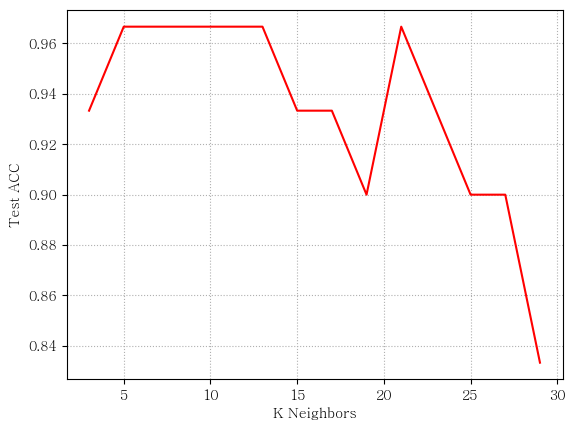

In [130]:
## Grid SEarch

knn = KNeighborsClassifier()

score_list = []
n_list =[]

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list, color = "r")
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()


In [136]:
##
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head(10)


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0
6,9.4,1.6,3.30,0.0
7,10.0,1.2,3.39,0.0
8,9.5,2.0,3.36,0.0
9,10.5,6.1,3.35,0.0


In [162]:
print("Counts of class =", wine["class"].value_counts())
wine["class"] = wine["class"].astype("int32")
print(wine["class"].value_counts())
print("wine info = ", wine.info)
print(wine[["class"]].nuique()) 


Counts of class = class
1    4898
0    1599
Name: count, dtype: int64
class
1    4898
0    1599
Name: count, dtype: int64
wine info =  <bound method DataFrame.info of       alcohol  sugar    pH  class
0         9.4    1.9  3.51      0
1         9.8    2.6  3.20      0
2         9.8    2.3  3.26      0
3         9.8    1.9  3.16      0
4         9.4    1.9  3.51      0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27      1
6493      9.6    8.0  3.15      1
6494      9.4    1.2  2.99      1
6495     12.8    1.1  3.34      1
6496     11.8    0.8  3.26      1

[6497 rows x 4 columns]>


AttributeError: 'DataFrame' object has no attribute 'nuique'

In [153]:
#summary statistic
wine_group = wine.groupby("class", observed = True)

wine_group.describe()

for idx, data in wine_group:
    print("class = ", idx)
    print(data.describe())
    print("="*50)

    #idx 가 class = 0, 1// 클래스별로 요약통계량 보고싶어서 for한거임 

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


In [169]:
#KNN
X = wine.loc[:, :"pH"]
y = wine["class"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y)

print("train_X shape = ", train_X.shape)
print("test_X shape = ", test_X.shape)

test_y.value_counts()

train_X shape =  (5197, 3)
test_X shape =  (1300, 3)


class
1    980
0    320
Name: count, dtype: int64

In [175]:
mean = train_X.mean()
std = train_X.std()

print(mean, std)

train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/ std

alcohol    10.490659
sugar       5.418135
pH          3.218676
dtype: float64 alcohol    1.189290
sugar      4.758034
pH         0.161011
dtype: float64


In [176]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)
print("train ACC = ", knn.score(train_scaled, train_y))
print("test ACC = ", knn.score(test_scaled, test_y))

train ACC =  0.9030209736386376
test ACC =  0.8423076923076923


In [177]:
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("samples", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  [0 1]
feature names =  ['alcohol' 'sugar' 'pH']
metric =  euclidean
samples 5197
k =  5


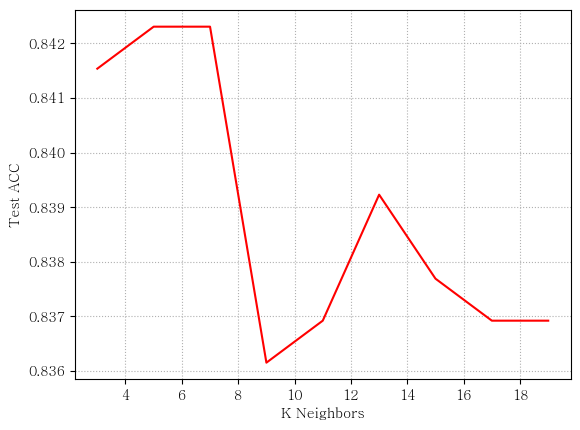

In [183]:
# Grid Search

knn = KNeighborsClassifier()

score_list = []
n_list = []
for n in range(2, 20): #class 가 0과1 2개니까 (2, )
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list, color = "r")
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()



In [157]:
## Visualization
# sns.countplot(wine, x = "class")
# plt.show()

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt = DecisionTreeClassifier()
dt.fit()
dt.score()